In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfd
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, InputLayer, BatchNormalization
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam



In [ ]:
dataset, dataset_info = tfd.load('malaria',with_info=True,shuffle_files=True,split=['train'],as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/27558 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/malaria/1.0.0.incompleteT5NBLO/malaria-train.tfrecord*...:   0%|          …

Dataset malaria downloaded and prepared to /root/tensorflow_datasets/malaria/1.0.0. Subsequent calls will reuse this data.


In [ ]:
dataset

[<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>]

In [ ]:
dataset_info

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_dir=PosixGPath('/tmp/tmpwsfpqzattfds'),
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasite detection in thin blood smear images},


In [ ]:
for data in dataset[0].take(2):
  print(data)


(<tf.Tensor: shape=(145, 148, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>, <tf.Tensor: shape=(), dtype=int64, numpy=1>)
(<tf.Tensor: shape=(103, 103, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
       

In [ ]:
def splits(dataset, Train_ratio, val_ratio, test_ratio):
  dataset_size = len(dataset)

  train_dataset = dataset.take(int(Train_ratio*dataset_size))

  val_test_dataset = dataset.skip(int(Train_ratio*dataset_size))
  val_dataset = val_test_dataset.take(int(val_ratio*dataset_size))

  test_dataset = val_test_dataset.skip(int(val_ratio*dataset_size))
  return train_dataset, val_dataset, test_dataset


In [ ]:
Train_ratio = 0.6
val_rat = 0
Test_rat = 0.4

data = tf.data.Dataset.range(10)
train_dataset,val_dataset,test_dataset = splits(dataset[0], Train_ratio, val_rat, Test_rat)

In [ ]:
print(list(train_dataset.take(1).as_numpy_iterator()))

[(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), 0)]


#Data Visualization

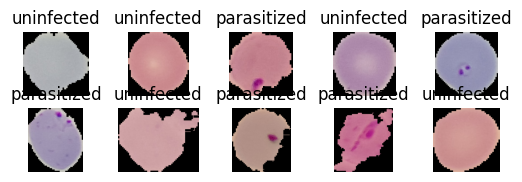

In [ ]:
for i, (image,label) in enumerate(train_dataset.take(10)):
  ax = plt.subplot(5,5, i + 1)
  plt.imshow(image)
  plt.title(dataset_info.features['label'].int2str(label))
  plt.axis('off')

#Data Processing

In [ ]:
IM_Size = 220

def resizing_rescaling(image,label):
  return tf.image.resize(image, (IM_Size,IM_Size))/255.0, label

In [ ]:
train_dataset = train_dataset.map(resizing_rescaling)
val_dataset = val_dataset.map(resizing_rescaling)
test_dataset = test_dataset.map(resizing_rescaling)

In [ ]:
for image,label in train_dataset.take(1):
  print(image)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(220, 220, 3), dtype=float32)


In [ ]:
train_dataset = train_dataset.shuffle(buffer_size=8,reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.shuffle(buffer_size=8,reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)


In [ ]:
model = tf.keras.Sequential([
    InputLayer(input_shape=(IM_Size,IM_Size,3)),

    Conv2D(filters=6, kernel_size=5,strides=1,padding='valid',activation='relu'),
    MaxPool2D(pool_size=2,strides=2),
    BatchNormalization(),

    Conv2D(filters=10, kernel_size=5,strides=1,padding='valid',activation='relu'),
    MaxPool2D(pool_size=2,strides=2),
    BatchNormalization(),

    Flatten(),

    Dense(40,activation='relu'),
    BatchNormalization(),

    Dense(8,activation='relu'),
    BatchNormalization(),

    Dense(1,activation='sigmoid')


])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 216, 216, 6)       456       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 108, 108, 6)       0         
 g2D)                                                            
                                                                 
 batch_normalization_4 (Bat  (None, 108, 108, 6)       24        
 chNormalization)                                                
                                                                 
 conv2d_3 (Conv2D)           (None, 104, 104, 10)      1510      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 52, 52, 10)        0         
 g2D)                                                            
                                                      

In [ ]:
model.compile(optimizer =Adam(learning_rate = 0.01),
              loss = BinaryCrossentropy(),
              metrics = 'accuracy')

In [ ]:
history = model.fit(train_dataset,  epochs =5, verbose = 1)

Epoch 1/5
517/517 [==============================] - 430s 830ms/step - loss: 0.1872 - accuracy: 0.9393
Epoch 2/5
517/517 [==============================] - 423s 818ms/step - loss: 0.1847 - accuracy: 0.9392
Epoch 3/5
517/517 [==============================] - 418s 808ms/step - loss: 0.1834 - accuracy: 0.9375
Epoch 4/5
517/517 [==============================] - 420s 812ms/step - loss: 0.1671 - accuracy: 0.9459
Epoch 5/5
517/517 [==============================] - 418s 809ms/step - loss: 0.1620 - accuracy: 0.9470


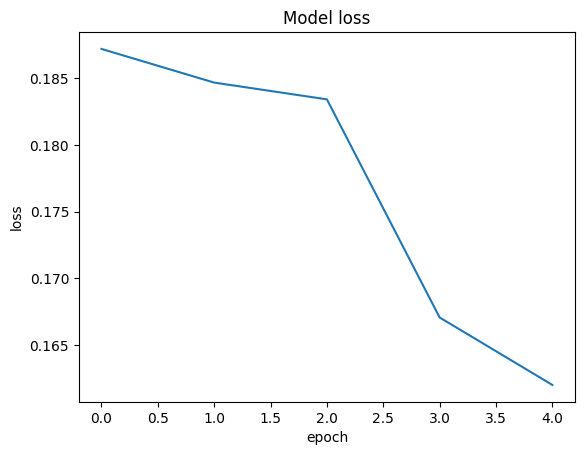

In [ ]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

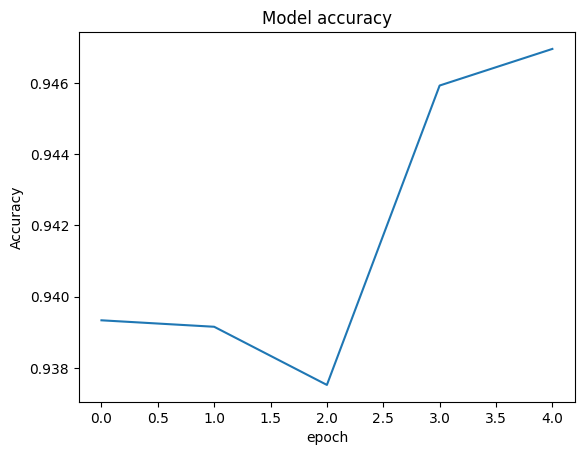

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.show()

#Evaluation and Testing

In [ ]:
test_dataset = test_dataset.batch(1)

In [ ]:
test_dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 220, 220, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
model.evaluate(test_dataset)

11024/11024 [==============================] - 141s 12ms/step - loss: 0.1757 - accuracy: 0.9475


[0.17573313415050507, 0.9474782347679138]

In [ ]:
model.predict(test_dataset.take(1))[0][0]

1/1 [==============================] - 6s 6s/step


0.9285689

In [ ]:
def paratise_or_not(x):
  if (x < 0.5):
    return str('P')
  else:
    return str('U')

In [ ]:
paratise_or_not(model.predict(test_dataset.take(1))[0][0])

1/1 [==============================] - 8s 8s/step


'U'